In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [5]:
# Grab and process the raw data
df_wine = pd.read_csv('winemag-data-130k-v2.csv', index_col=[0])

In [6]:
df_wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [7]:
df_wine.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


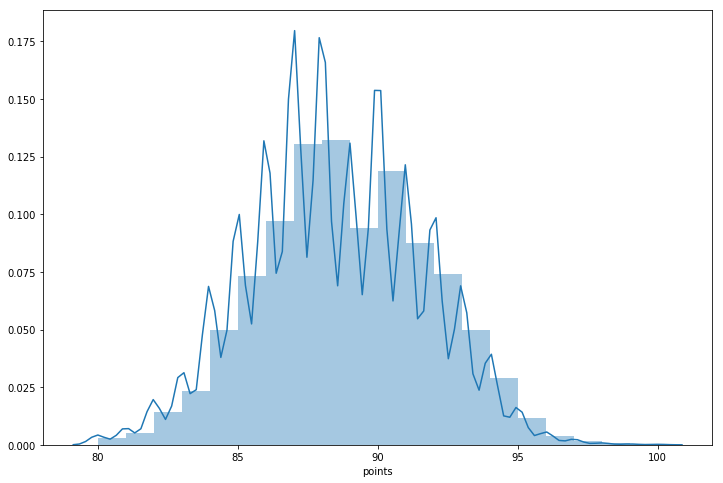

In [8]:
plt.figure(figsize=(12,8))
sns.distplot(df_wine.points, bins=20)
plt.show()

In [9]:
df_wine_clean = df_wine.dropna()

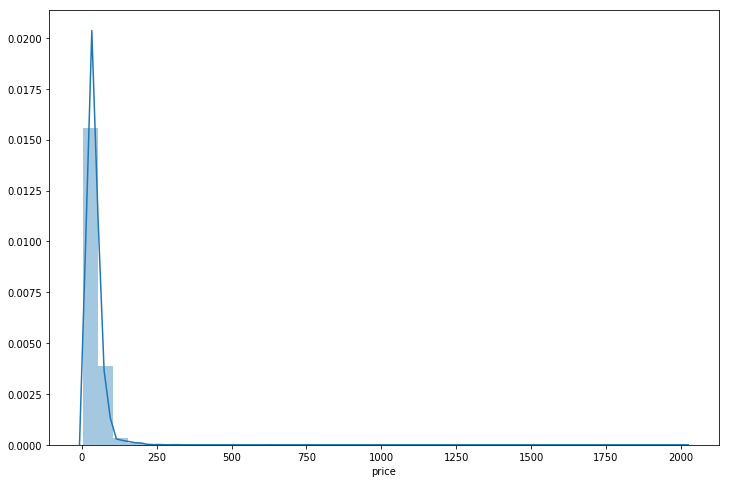

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(df_wine_clean.price,bins=40)
plt.show()

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x576 with 0 Axes>

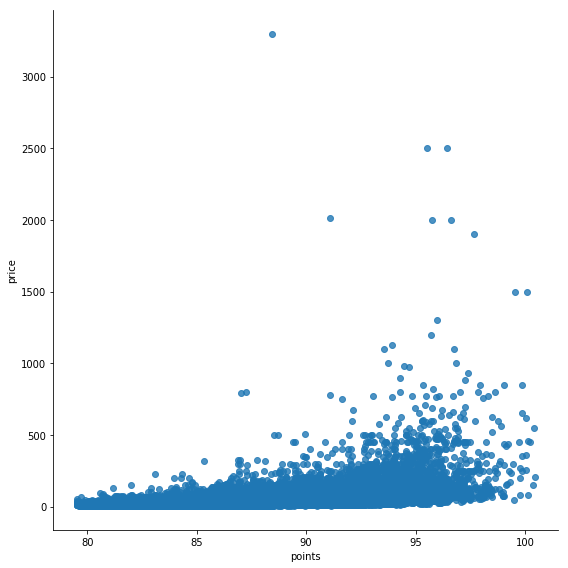

In [11]:
plt.figure(figsize=(12,8))
b = sns.FacetGrid(data=df_wine, size=8)
b = b.map(
    sns.regplot,
    'points',
    'price',
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

In [12]:
# X = StandardScaler().fit_transform(df_wine_clean[['price', 'points']])

# sklearn_pca = PCA(n_components=4)
# Y_sklearn = sklearn_pca.fit_transform(X)

# print(
#     'The percentage of total variance in the dataset explained by each',
#     'component from Sklearn PCA.\n',
#     sklearn_pca.explained_variance_ratio_
# )

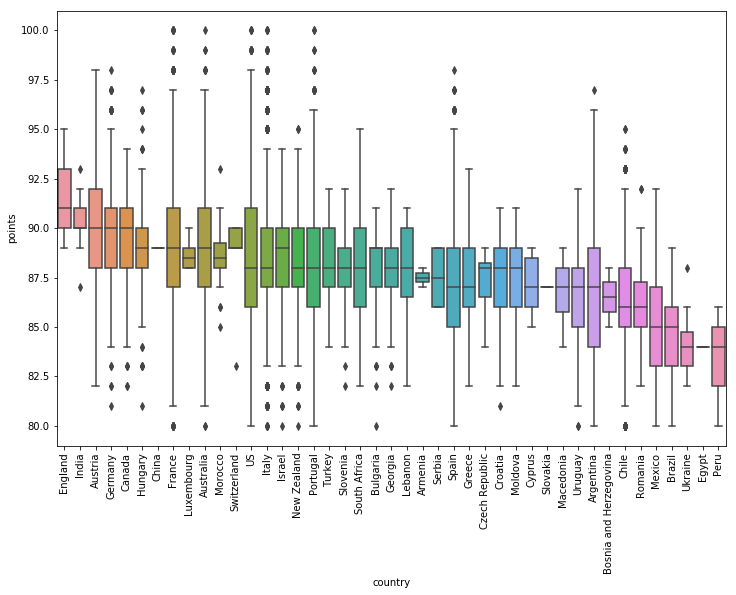

In [13]:
country_order = df_wine.groupby('country')['points'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12,8))
a = sns.boxplot(x='country', y='points', data=df_wine, order=country_order)
a.set_xticklabels(country_order, rotation=90)
plt.show()

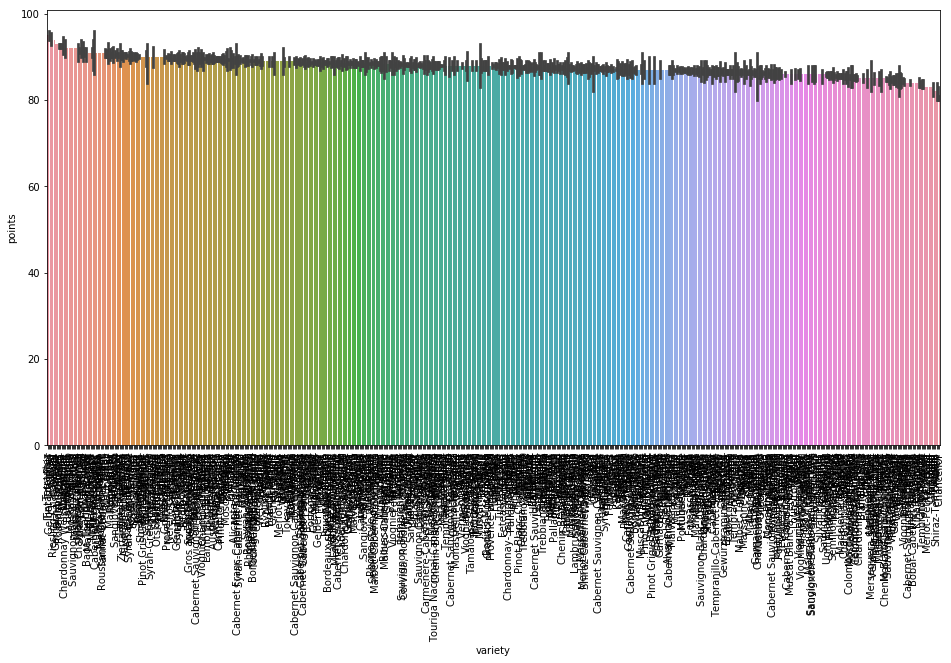

In [14]:
variety_order = df_wine.groupby('variety')['points'].mean().sort_values(ascending=False).index
plt.figure(figsize=(16,8))
a = sns.barplot(x='variety', y='points', data=df_wine, order=variety_order)
a.set_xticklabels(variety_order, rotation=90)
plt.show()

In [15]:
df_wine_var = df_wine[['variety', 'price','points']].groupby(['variety']).mean()
df_wine_var.sort_values('points', ascending=False)

,price,points
variety,,
Terrantez,236.000000,95.000000
Tinta del Pais,47.500000,95.000000
Gelber Traminer,35.000000,95.000000
Bual,100.000000,94.142857
Sercial,50.000000,94.000000
Riesling-Chardonnay,40.000000,94.000000
Ramisco,495.000000,93.000000
Garnacha-Cariñena,57.000000,93.000000
Blauburgunder,19.000000,93.000000


Need to create a feature list out of varietals as the current designations are not useful.

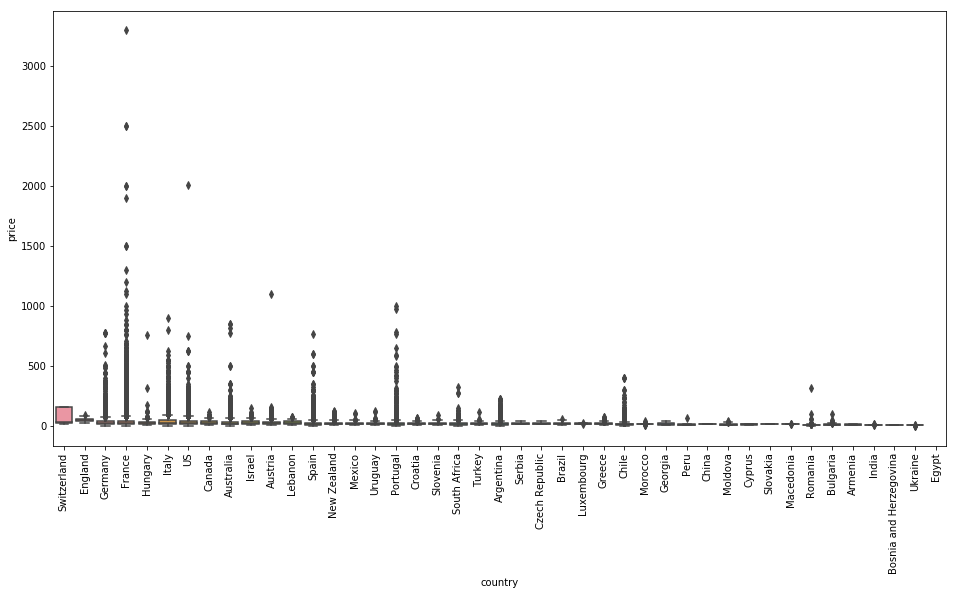

In [16]:
country_order_price = df_wine.groupby('country')['price'].mean().sort_values(ascending=False).index
plt.figure(figsize=(16,8))
a = sns.boxplot(x='country', y='price', data=df_wine, order=country_order_price)
a.set_xticklabels(country_order_price, rotation=90)
plt.show()

Need to remove outliers from the price model as it's difficult to see measures of variance with such large outliers skewing the data.

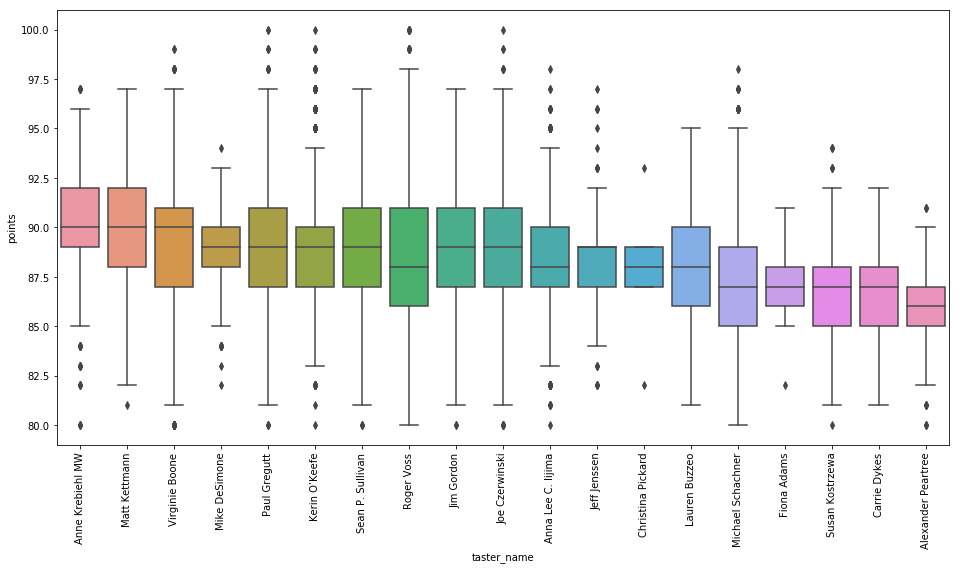

In [18]:
taster_order = df_wine.groupby('taster_name')['points'].mean().sort_values(ascending=False).index
plt.figure(figsize=(16,8))
a = sns.boxplot(x='taster_name', y='points', data=df_wine, order=taster_order)
a.set_xticklabels(taster_order, rotation=90)
plt.show()

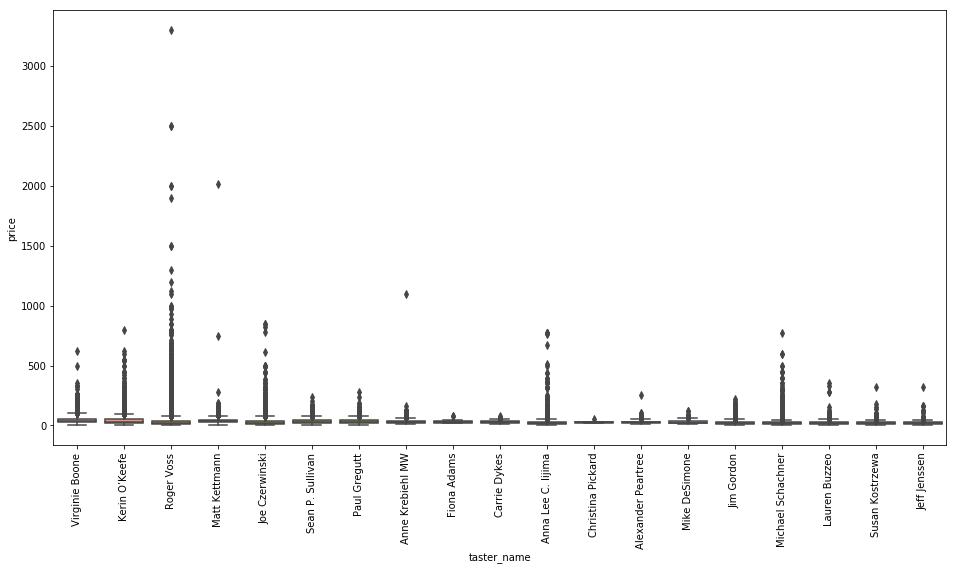

In [21]:
taster_order_pri = df_wine.groupby('taster_name')['price'].mean().sort_values(ascending=False).index
plt.figure(figsize=(16,8))
a = sns.boxplot(x='taster_name', y='price', data=df_wine, order=taster_order_pri)
a.set_xticklabels(taster_order_pri, rotation=90)
plt.show()

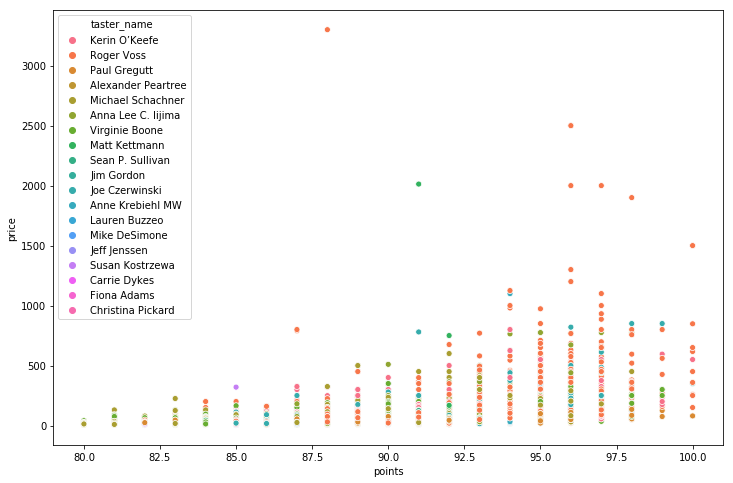

In [20]:
plt.figure(figsize=(12,8))
c = sns.scatterplot(x='points', y='price', hue='taster_name', data=df_wine)
plt.show()

          points     price
points  1.000000  0.416167
price   0.416167  1.000000


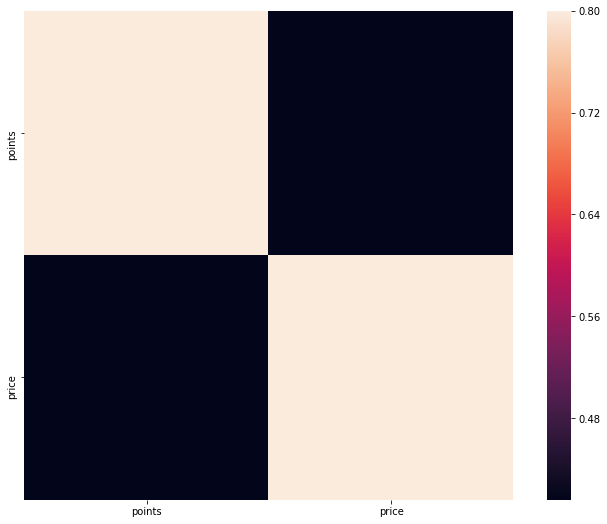

In [17]:
corr_wine = df_wine.corr()
print(corr_wine)

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_wine, vmax=.8, square=True)
plt.show()

### Possible experiment:
Can you predict the price of wine based on points, region, year, variety, etc.?

### Features to create:
1. vintage year from title - Seems to be a pretty obvious one to want to look at different wine vintages. There may be an interesting analysis to look at wine's points from one year to the next among the same wineries. But more importantly, it will add a key component 
2. Unique list of varieties - there are over 700 varietals, however there are also a lot of combinations of varietals that could be split into unique varietals
3. Tokenize words in description - need to isolate all of the text information from the description. Could then use Naive Bayes to figure out how well you can predict price from description alone
4. Categorical representation of wine points - either below average, average and above average; or by standard deviation
5. Create groupings around like wines - this would require some domain knowledge, but I think it's necessary to separate lighter wines (whites or pinots) from heavier wines (cabernet savuignon)
6. Red vs. white wine - need a basic binary differentator as these classes of wines are vastly different
7. Create continent feature (or perhaps a much smaller category than country) - I'm not sure how important this is, but it would be good to group italian, french, US and then all other. These are the most prominent wine growing regions and could be wothwhile to separate
8. Wine strategy - i.e. budget, mid-market, luxury, etc. wines based on price - you might have to create arbitrary thresholds to determine this category, but given how many large price outliers there are and the nature of boutique wine versus mass market wine; this could be valuable especially as we're trying to predict price after all.
9. Characteristics of description - i.e. word length of description, letter characters in description, etc. - perhaps more verbose descriptions mean the wine is better? or perhaps the more a sommelier discusses a wine, the higher the perceived value by the customer when trying to buy it.
10. taster groupings - there seems to be some segmentation between tasters and what type of wine they review and score. Roger Voss tends to stick to higher price wine but also has higher variance in his scores. Christina Pickard reviews cheaper wine but has much less variance in her scores. Therefore, by grouping some of the tasters I may get more consistency on what scores produce which price output.